# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv('Global_Music_Streaming_Listener_Preferences.csv')
df

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,U5995,60,UK,Deezer,Country,348,81,Post Malone,Premium,Morning,49.23,22.36
4996,U5996,38,Australia,Deezer,Hip-Hop,225,218,BTS,Premium,Night,17.08,58.23
4997,U5997,27,Brazil,Amazon Music,Metal,568,277,Taylor Swift,Premium,Night,69.39,51.71
4998,U5998,58,Canada,Amazon Music,EDM,523,492,Bad Bunny,Premium,Night,43.44,24.53


## Check The Data

In [3]:
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [4]:
df.shape

(5000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,36.664000,13.763844,13.00,25.0000,37.00,49.0000,60.00
Minutes Streamed Per Day,5000.0,309.237200,172.029822,10.00,161.0000,316.00,457.2500,600.00
Number of Songs Liked,5000.0,253.517200,146.369280,1.00,126.0000,254.00,382.0000,500.00
Discover Weekly Engagement (%),5000.0,50.296464,23.171936,10.02,30.1475,50.42,70.3375,89.99
Repeat Song Rate (%),5000.0,42.391060,21.444121,5.00,24.1950,41.96,60.7400,79.99


In [7]:
df.sample

<bound method NDFrame.sample of      User_ID  Age      Country Streaming Platform Top Genre  \
0      U1000   34        Japan              Tidal    Reggae   
1      U1001   24      Germany             Deezer   Country   
2      U1002   49      Germany             Deezer       Pop   
3      U1003   55    Australia            YouTube    Reggae   
4      U1004   13      Germany       Amazon Music    Reggae   
...      ...  ...          ...                ...       ...   
4995   U5995   60           UK             Deezer   Country   
4996   U5996   38    Australia             Deezer   Hip-Hop   
4997   U5997   27       Brazil       Amazon Music     Metal   
4998   U5998   58       Canada       Amazon Music       EDM   
4999   U5999   30  South Korea            YouTube      Rock   

      Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                          295                    138              Adele   
1                           86                    388      

In [8]:
df.nunique()

User_ID                                     5000
Age                                           48
Country                                       10
Streaming Platform                             6
Top Genre                                     10
Minutes Streamed Per Day                     591
Number of Songs Liked                        500
Most Played Artist                            10
Subscription Type                              2
Listening Time (Morning/Afternoon/Night)       3
Discover Weekly Engagement (%)              3687
Repeat Song Rate (%)                        3687
dtype: int64

In [9]:
df.isna().sum()

User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64

In [10]:
df.describe(include='all')

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000,5000.000000,5000,5000,5000,5000.000000,5000.00000,5000,5000,5000,5000.000000,5000.000000
unique,5000,NaN,10,6,10,NaN,NaN,10,2,3,NaN,NaN
top,U1000,NaN,Australia,Amazon Music,Reggae,NaN,NaN,Bad Bunny,Premium,Night,NaN,NaN
freq,1,NaN,526,861,532,NaN,NaN,528,2526,1745,NaN,NaN
mean,NaN,36.664000,NaN,NaN,NaN,309.237200,253.51720,NaN,NaN,NaN,50.296464,42.391060
std,NaN,13.763844,NaN,NaN,NaN,172.029822,146.36928,NaN,NaN,NaN,23.171936,21.444121
min,NaN,13.000000,NaN,NaN,NaN,10.000000,1.00000,NaN,NaN,NaN,10.020000,5.000000
25%,NaN,25.000000,NaN,NaN,NaN,161.000000,126.00000,NaN,NaN,NaN,30.147500,24.195000
50%,NaN,37.000000,NaN,NaN,NaN,316.000000,254.00000,NaN,NaN,NaN,50.420000,41.960000
75%,NaN,49.000000,NaN,NaN,NaN,457.250000,382.00000,NaN,NaN,NaN,70.337500,60.740000


## Exploratory Data Analysis

In [11]:
num_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
cat_cols = ['User_ID', 'Country', 'Streaming Platform', 'Top Genre', 'Most Played Artist', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)']

print(len(num_cols))
print(len(cat_cols))

5
7


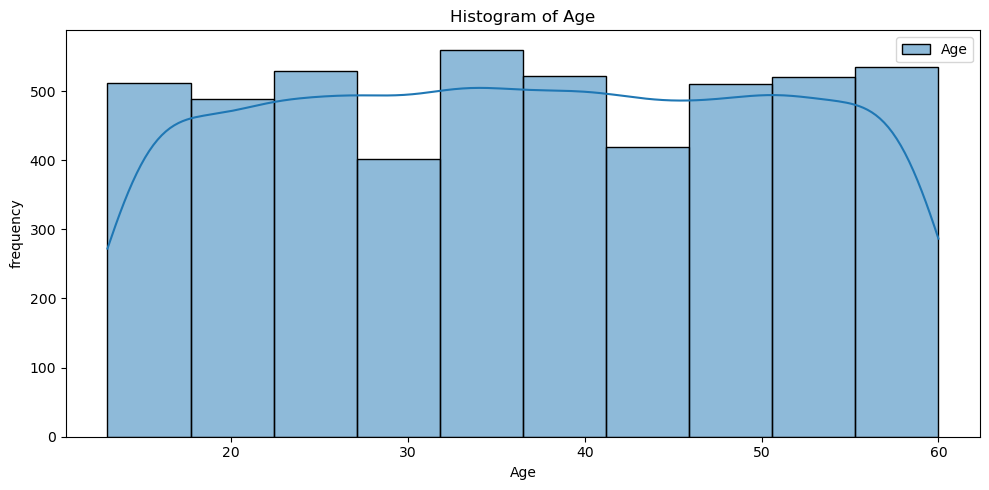

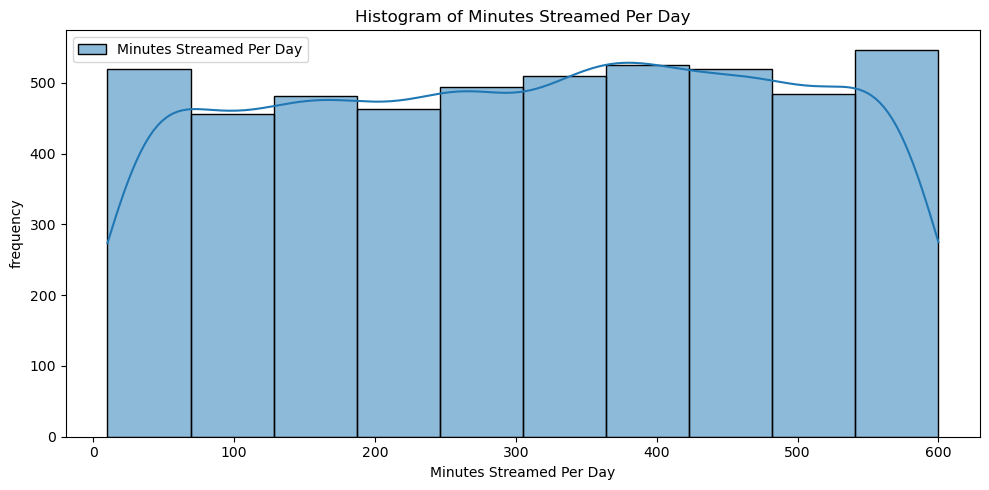

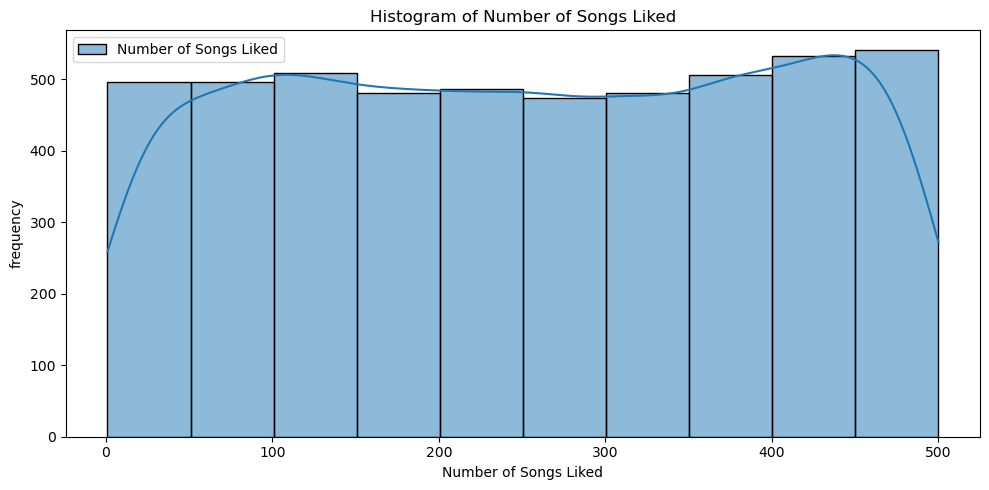

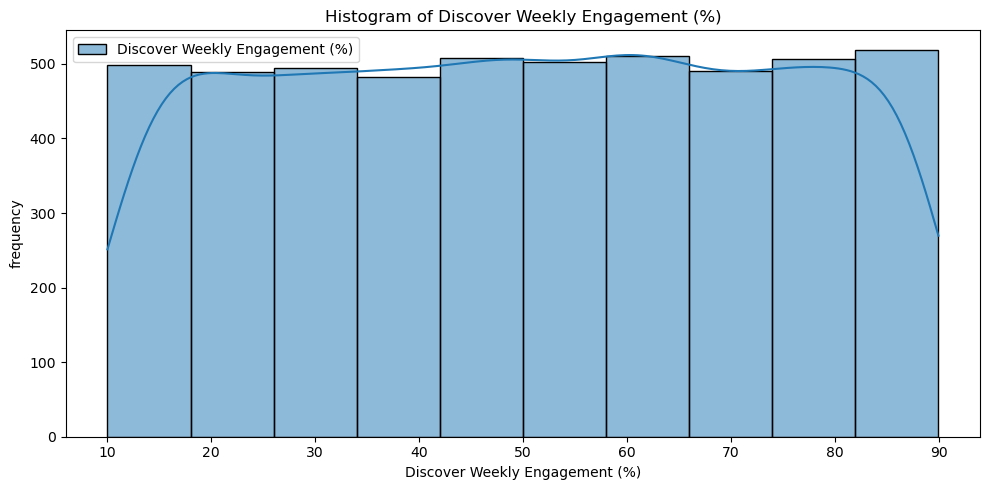

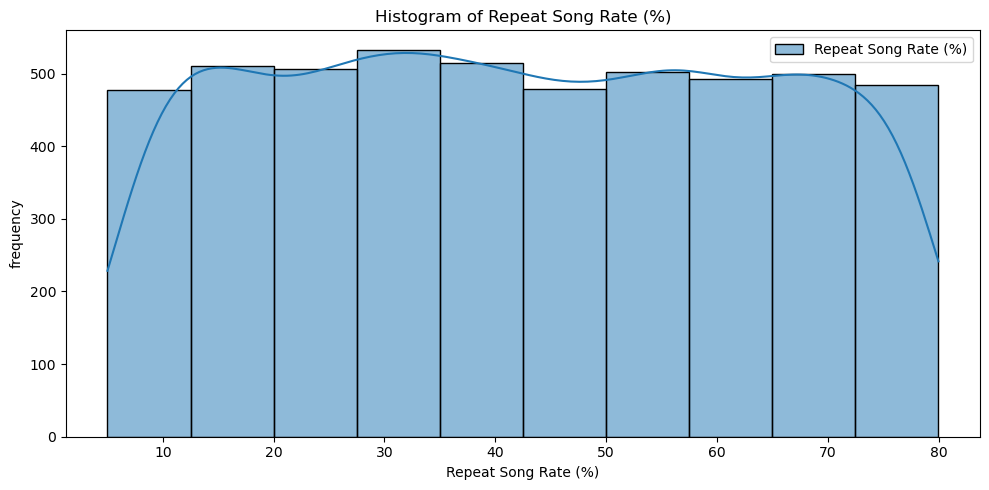

In [12]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

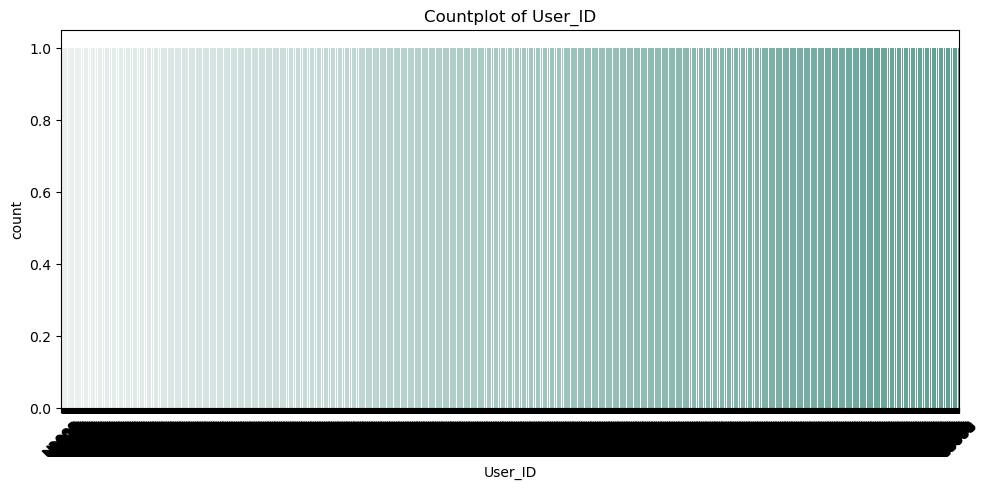

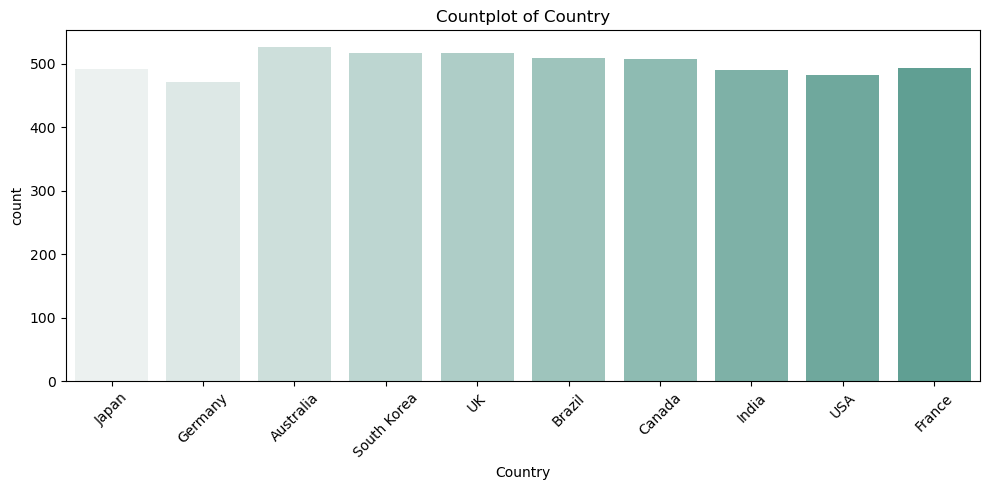

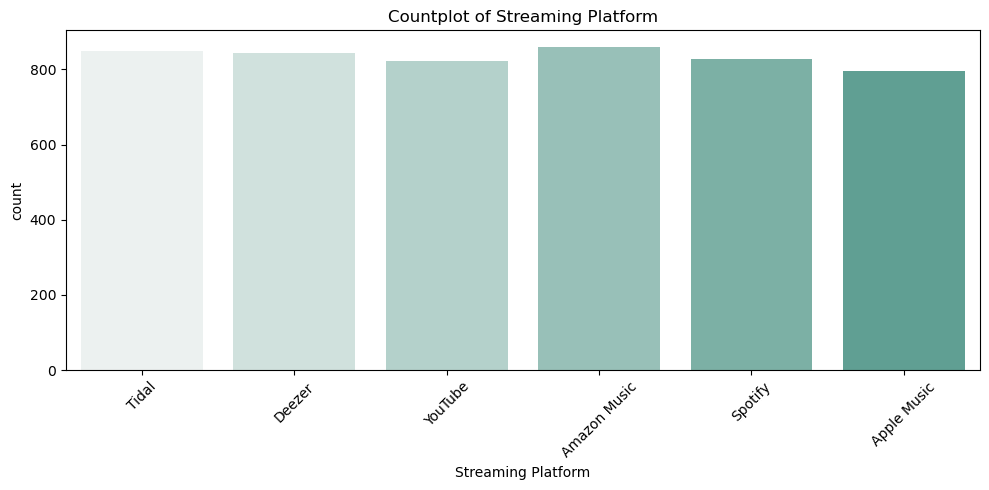

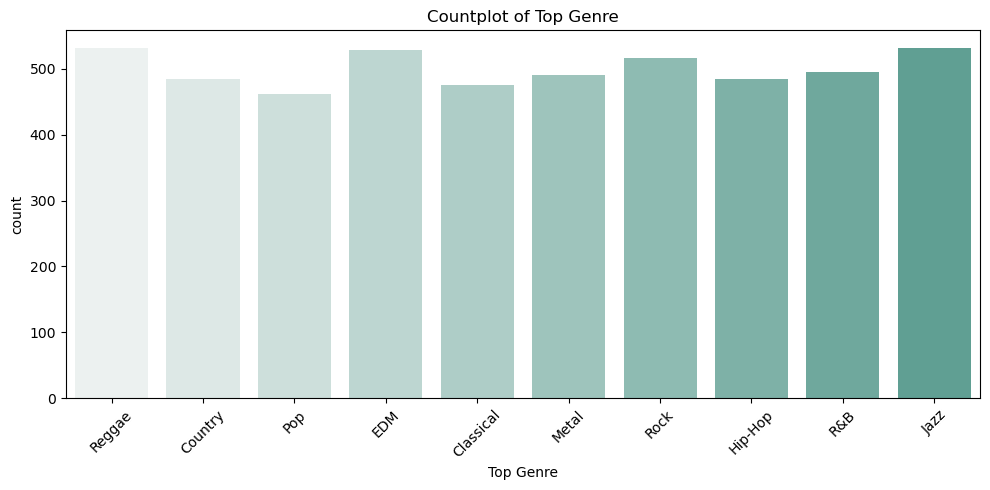

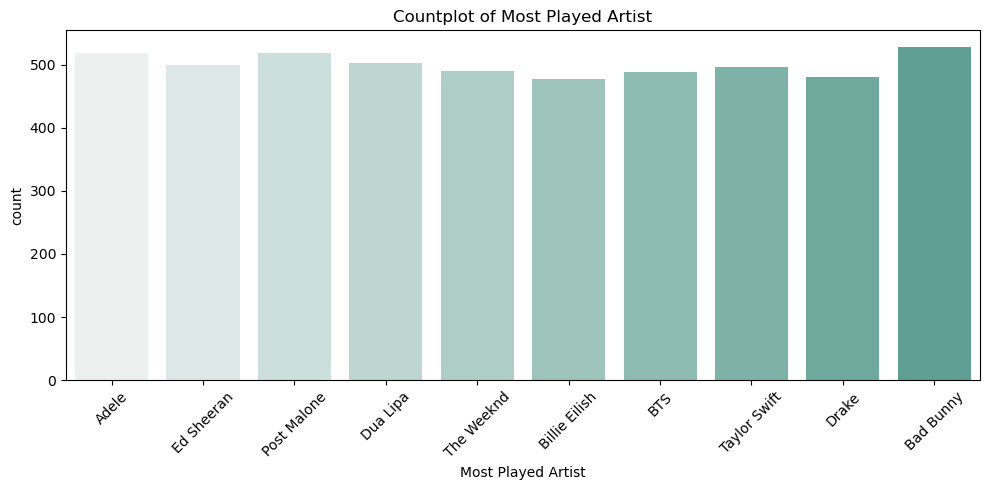

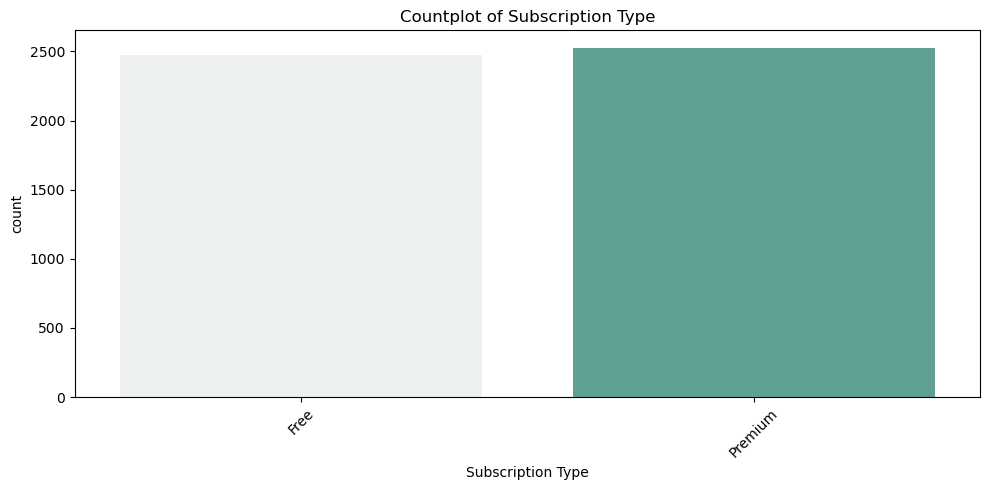

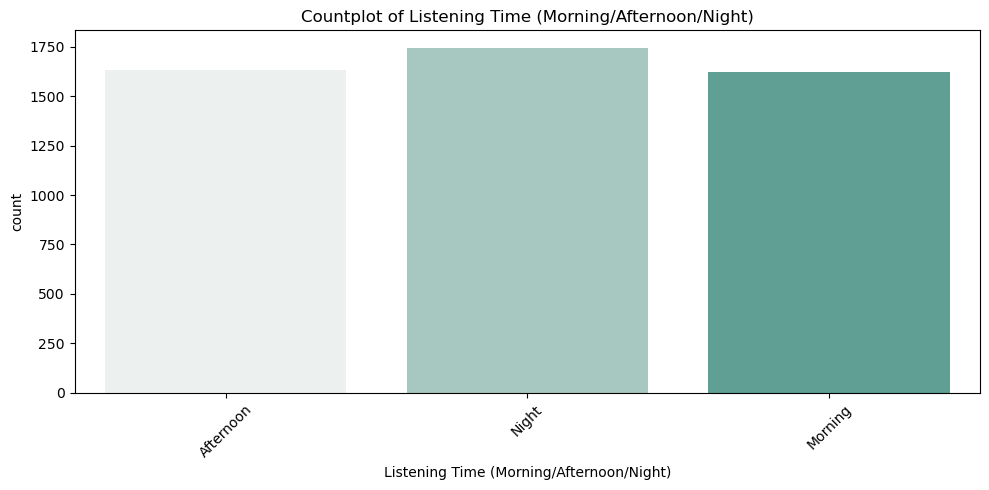

In [13]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='light:#5A9')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Visualization

### 1. Age Distribution

In [132]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

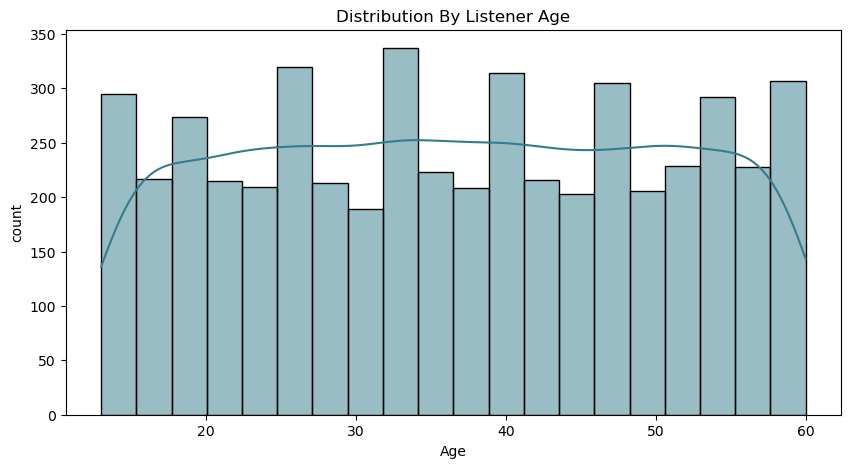

In [133]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='#357C8C')
plt.title('Distribution By Listener Age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

### 2. Top 10 Streaming Platforms

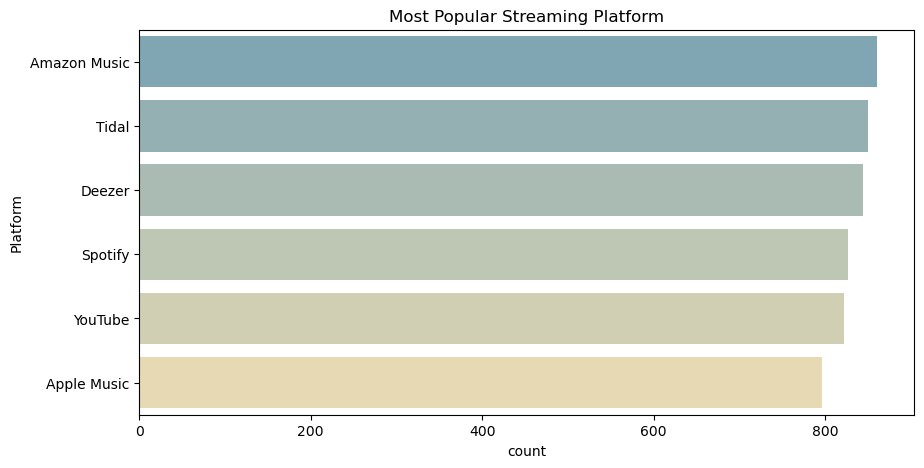

In [134]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Streaming Platform'], order=df['Streaming Platform'].value_counts().index, palette='blend:#7AB,#EDA')
plt.title('Most Popular Streaming Platform')
plt.xlabel('count')
plt.ylabel('Platform')
plt.show()

### 3. Top Genres

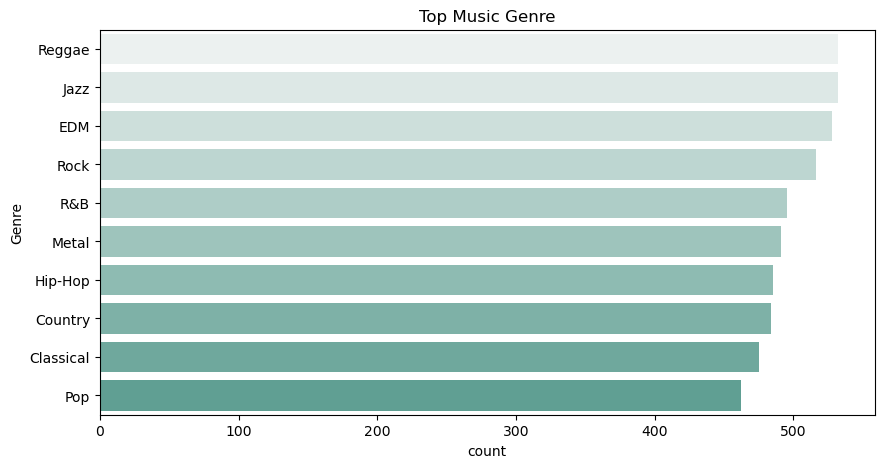

In [135]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Top Genre'], order=df['Top Genre'].value_counts().index, palette='light:#5A9')
plt.title('Top Music Genre')
plt.xlabel('count')
plt.ylabel('Genre')
plt.show()

### 4. Minutes Streamed vs. Repeat Song Rate

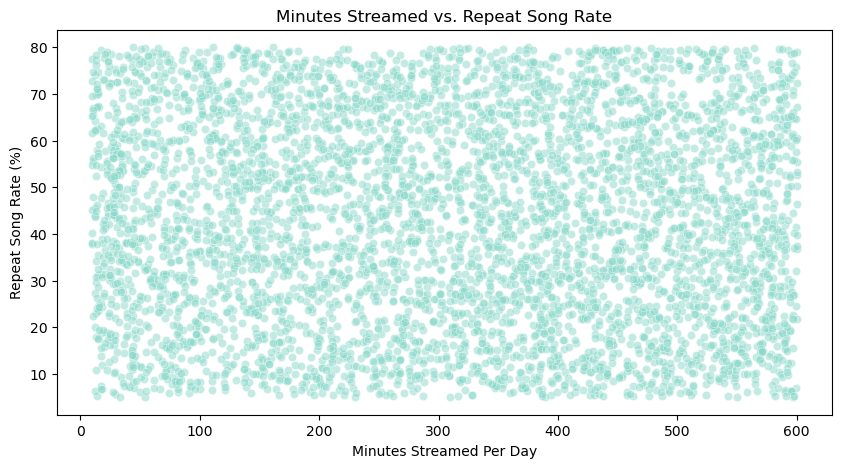

In [136]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Minutes Streamed Per Day'], y=df['Repeat Song Rate (%)'], alpha=0.5, color='#89D9CA')
plt.title('Minutes Streamed vs. Repeat Song Rate')
plt.xlabel('Minutes Streamed Per Day')
plt.ylabel('Repeat Song Rate (%)')
plt.show()

### 5. Subscription Type vs. Repeat Song Rate

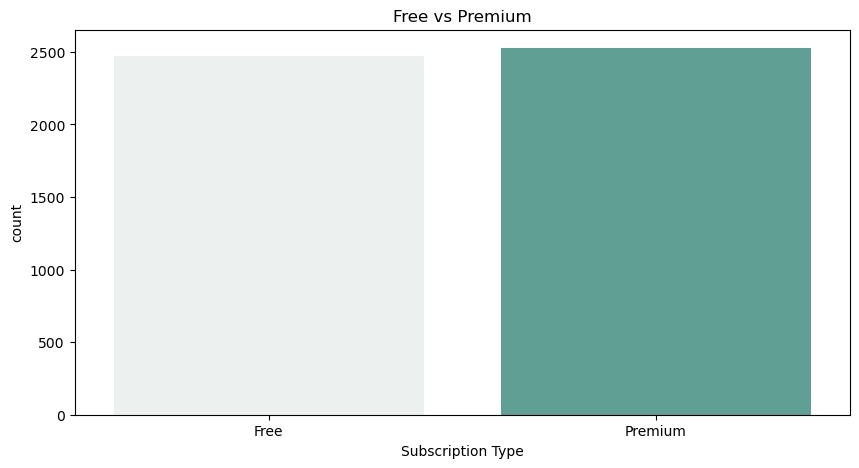

In [137]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Subscription Type'], palette='light:#5A9')
plt.title('Free vs Premium')
plt.xlabel('Subscription Type')
plt.ylabel('count')
plt.show()

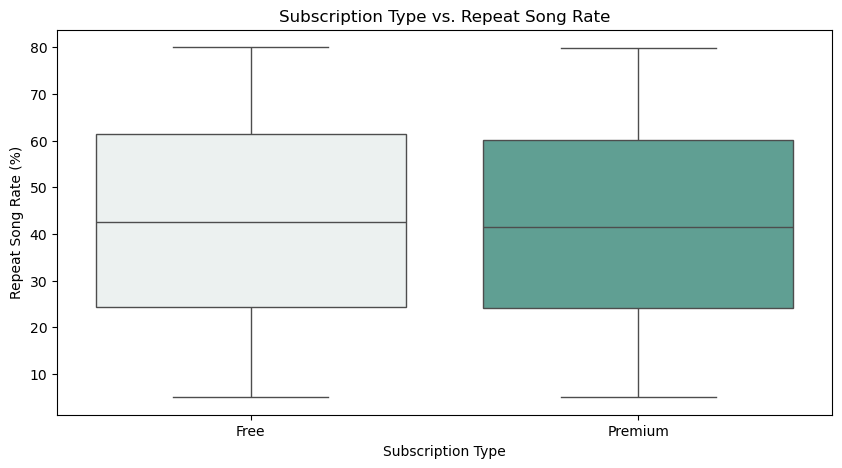

In [138]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Subscription Type', y='Repeat Song Rate (%)', palette='light:#5A9')
plt.title('Subscription Type vs. Repeat Song Rate')
plt.xlabel('Subscription Type')
plt.ylabel('Repeat Song Rate (%)')
plt.show()

### 6. Top 5 Most Played Artists

In [139]:
top_artists = df['Most Played Artist'].value_counts().head(5)
top_artists

Most Played Artist
Bad Bunny      528
Adele          519
Post Malone    519
Dua Lipa       502
Ed Sheeran     500
Name: count, dtype: int64

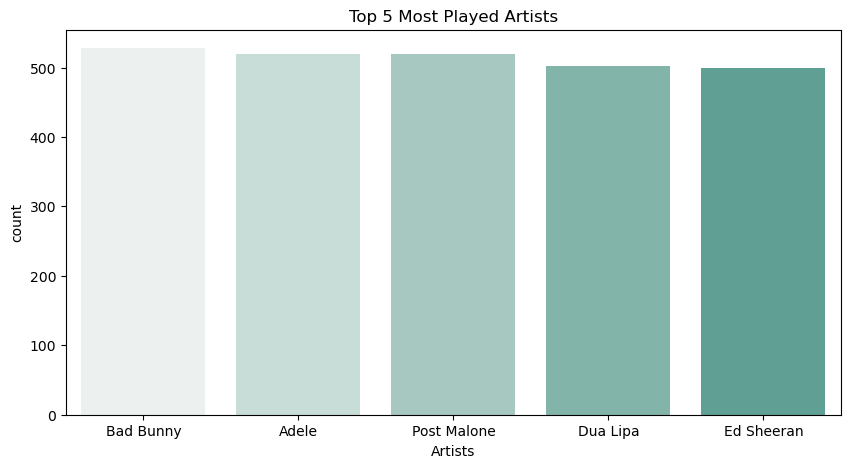

In [140]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='light:#5A9')
plt.title('Top 5 Most Played Artists')
plt.xlabel('Artists')
plt.ylabel('count')
plt.show()

### 7. Listening Time & Subscription Type vs Repeat Song Rate

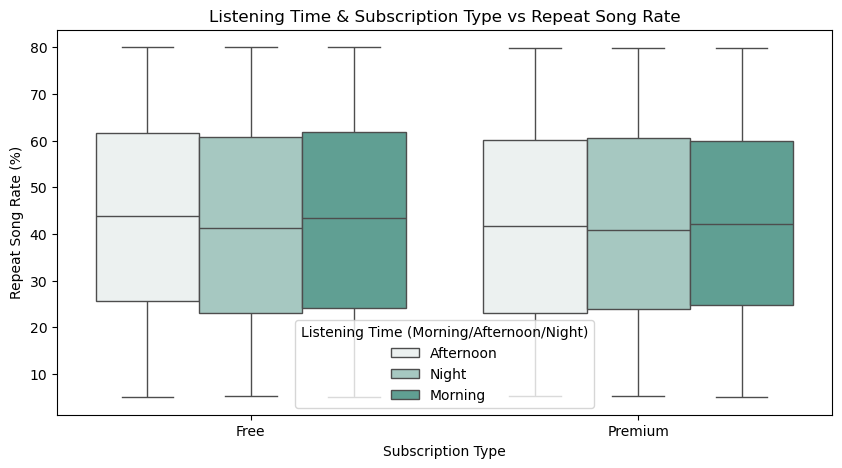

In [141]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Subscription Type', y='Repeat Song Rate (%)', hue='Listening Time (Morning/Afternoon/Night)', palette='light:#5A9')
plt.title('Listening Time & Subscription Type vs Repeat Song Rate')
plt.show()

In [14]:
df

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,U5995,60,UK,Deezer,Country,348,81,Post Malone,Premium,Morning,49.23,22.36
4996,U5996,38,Australia,Deezer,Hip-Hop,225,218,BTS,Premium,Night,17.08,58.23
4997,U5997,27,Brazil,Amazon Music,Metal,568,277,Taylor Swift,Premium,Night,69.39,51.71
4998,U5998,58,Canada,Amazon Music,EDM,523,492,Bad Bunny,Premium,Night,43.44,24.53


## Predictive Modeling

### 1. Train Test Split

In [15]:
df = df.drop(['User_ID'], axis=1)

In [16]:
val = {'Subscription Type': {'Free': 0, 'Premium': 1}}
df.replace(val, inplace=True)
df

,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,34,Japan,Tidal,Reggae,295,138,Adele,0,Afternoon,47.42,16.74
1,24,Germany,Deezer,Country,86,388,Ed Sheeran,1,Night,12.06,69.25
2,49,Germany,Deezer,Pop,363,368,Post Malone,1,Afternoon,47.19,67.38
3,55,Australia,YouTube,Reggae,348,349,Dua Lipa,1,Morning,31.27,76.51
4,13,Germany,Amazon Music,Reggae,30,328,Adele,0,Night,30.68,43.41
...,...,...,...,...,...,...,...,...,...,...,...
4995,60,UK,Deezer,Country,348,81,Post Malone,1,Morning,49.23,22.36
4996,38,Australia,Deezer,Hip-Hop,225,218,BTS,1,Night,17.08,58.23
4997,27,Brazil,Amazon Music,Metal,568,277,Taylor Swift,1,Night,69.39,51.71
4998,58,Canada,Amazon Music,EDM,523,492,Bad Bunny,1,Night,43.44,24.53


In [17]:
features = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
target = 'Subscription Type'

X = df[features]
y = df[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4000, 5) (1000, 5)


### 2. Models

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [20]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.512

 Decison Tree Accuracy: 0.496

 Random Forest Accuracy: 0.503

 Gradient Boosting Accuracy: 0.469

 K-Nearest Neighbors Accuracy: 0.5

 Support Vector Machine Accuracy: 0.496


#### Best Model

In [21]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.496


### 3. Classification Report

In [22]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.18      0.26       499
           1       0.50      0.81      0.62       501

    accuracy                           0.50      1000
   macro avg       0.49      0.50      0.44      1000
weighted avg       0.49      0.50      0.44      1000



### 4. Confusion Matrix

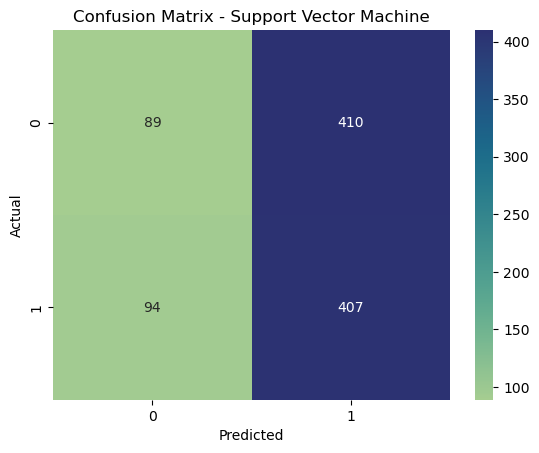

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()